In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [2]:
veo_paygrade_df = pd.read_excel('../data/veopu.xlsx', sheet_name="By Pay Grade")
veo_mos_industry_df = pd.read_excel('../data/veopu.xlsx', sheet_name="By DOD Occupation-Industry")
veo_education_df = pd.read_excel('../data/veopu.xlsx', sheet_name="By Education")
veo_afqt_df = pd.read_excel('../data/veopu.xlsx', sheet_name="By AFQT Tercile")

In [3]:
veo_paygrade_df.head()

,Veterans Employment Outcomes By Pay Grade,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Source: United States Census Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Obs,cohort,label_cohort,cohort_years,paygrade_level,paygrade,label_paygrade,y1_emp,y5_emp,y10_emp,...,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_nonemp,status_y5_nonemp,status_y10_nonemp,status_y1_earn,status_y5_earn,status_y10_earn
3,1,0,2000-2015,16,X,E1-E9,All pay grade bins,312300,262900,155000,...,75520,1,1,1,1,1,1,1,1,1
4,2,0,2000-2015,16,E,E1,Private,11810,9921,6246,...,52720,1,1,1,1,1,1,1,1,1


In [15]:
veo_paygrade = veo_paygrade_df.drop([0,1])
veo_paygrade.columns = veo_paygrade.iloc[0]
veo_paygrade = veo_paygrade[1:]
veo_paygrade = veo_paygrade.drop(['Obs', 'cohort', 'paygrade_level', 'status_y1_emp'], axis=1)
veteran_paygrade = veo_paygrade[veo_paygrade['cohort_years'] == 16]
veteran_paygrade

2,label_cohort,cohort_years,paygrade,label_paygrade,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,...,y5_p75_earnings,y10_p75_earnings,status_y5_emp,status_y10_emp,status_y1_nonemp,status_y5_nonemp,status_y10_nonemp,status_y1_earn,status_y5_earn,status_y10_earn
3,2000-2015,16,E1-E9,All pay grade bins,312300,262900,155000,342900,168900,84120,...,65130,75520,1,1,1,1,1,1,1,1
4,2000-2015,16,E1,Private,11810,9921,6246,17410,10500,6163,...,43900,52720,1,1,1,1,1,1,1,1
5,2000-2015,16,E2,Private (PV2),6056,5462,3947,9079,5719,3529,...,43390,51540,1,1,1,1,1,1,1,1
6,2000-2015,16,E3,Private First Class (PFC),12160,11020,7568,19130,10120,5743,...,46270,56540,1,1,1,1,1,1,1,1
7,2000-2015,16,E4,Corporal (CPL) or Specialist (SPC),123100,105300,67890,161900,74620,36740,...,54700,67270,1,1,1,1,1,1,1,1
8,2000-2015,16,E5,Sergeant (SGT),73890,64270,34460,78890,37660,15940,...,68300,83060,1,1,1,1,1,1,1,1
9,2000-2015,16,E6,Staff Sergeant (SSG),30400,23300,12350,26450,12970,6332,...,76970,86820,1,1,1,1,1,1,1,1
10,2000-2015,16,E7-E9,"Sergeant First Class (SFC), Master Sergeant (M...",54810,43670,22460,30140,17300,9629,...,85280,91170,1,1,1,1,1,1,1,1


In [43]:
veteran_paygrade_bins = veteran_paygrade.set_index('paygrade')
# veteran_paygrade_bins = veteran_paygrade_bins.drop("enlisted_status",axis=1)
veteran_paygrade_bins = veteran_paygrade_bins.drop(['label_cohort', 'cohort_years', 'label_paygrade'], axis=1)
veteran_paygrade_bins = veteran_paygrade_bins.drop(['status_y5_emp', 'status_y10_emp',	'status_y1_nonemp',	'status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn',
'status_y5_emp','status_y10_emp','status_y1_nonemp','status_y5_nonemp',	'status_y10_nonemp','status_y1_earn','status_y5_earn','status_y10_earn'], axis=1)
veteran_paygrade_bins

2,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
paygrade,,,,,,,,,,,,,,,
E1-E9,312300,262900,155000,342900,168900,84120,23330,31130,36480,34630,45420,52620,51030,65130,75520
E1,11810,9921,6246,17410,10500,6163,18440,21260,25010,25130,30630,37080,34960,43900,52720
E2,6056,5462,3947,9079,5719,3529,18010,21550,25030,24530,30950,36490,34270,43390,51540
E3,12160,11020,7568,19130,10120,5743,18480,22910,27450,25460,33180,40120,35270,46270,56540
E4,123100,105300,67890,161900,74620,36740,20640,27460,33710,29250,39480,47940,40640,54700,67270
E5,73890,64270,34460,78890,37660,15940,24910,34910,42390,36510,49060,59600,52130,68300,83060
E6,30400,23300,12350,26450,12970,6332,30190,39540,43950,43120,54520,61440,62240,76970,86820
E7-E9,54810,43670,22460,30140,17300,9629,36950,46030,48400,52340,63570,67910,72730,85280,91170


In [47]:
veteran_paygrade_bins.loc['E1-E5'] = veteran_paygrade_bins.aggregate(['E1','E2','E3','E4','E5']).sum()
veteran_paygrade_bins.loc['E6-E9'] = veteran_paygrade_bins.aggregate(['E6','E7-E9']).sum()
veteran_paygrade_bins

2,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
paygrade,,,,,,,,,,,,,,,
E1-E9,312300,262900,155000,342900,168900,84120,23330,31130,36480,34630,45420,52620,51030,65130,75520
E1,11810,9921,6246,17410,10500,6163,18440,21260,25010,25130,30630,37080,34960,43900,52720
E2,6056,5462,3947,9079,5719,3529,18010,21550,25030,24530,30950,36490,34270,43390,51540
E3,12160,11020,7568,19130,10120,5743,18480,22910,27450,25460,33180,40120,35270,46270,56540
E4,123100,105300,67890,161900,74620,36740,20640,27460,33710,29250,39480,47940,40640,54700,67270
E5,73890,64270,34460,78890,37660,15940,24910,34910,42390,36510,49060,59600,52130,68300,83060
E6,30400,23300,12350,26450,12970,6332,30190,39540,43950,43120,54520,61440,62240,76970,86820
E7-E9,54810,43670,22460,30140,17300,9629,36950,46030,48400,52340,63570,67910,72730,85280,91170
E1-E5,227016,195973,120111,286409,138619,68115,100480,128090,153590,140880,183300,221230,197270,256560,311130


In [70]:
reset_bins = veteran_paygrade_bins.reset_index()
# veteran_paygrade_bins.loc['E1-E5']
reset_bins

2,paygrade,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,y5_p25_earnings,y10_p25_earnings,y1_p50_earnings,y5_p50_earnings,y10_p50_earnings,y1_p75_earnings,y5_p75_earnings,y10_p75_earnings
0,E1-E9,312300,262900,155000,342900,168900,84120,23330,31130,36480,34630,45420,52620,51030,65130,75520
1,E1,11810,9921,6246,17410,10500,6163,18440,21260,25010,25130,30630,37080,34960,43900,52720
2,E2,6056,5462,3947,9079,5719,3529,18010,21550,25030,24530,30950,36490,34270,43390,51540
3,E3,12160,11020,7568,19130,10120,5743,18480,22910,27450,25460,33180,40120,35270,46270,56540
4,E4,123100,105300,67890,161900,74620,36740,20640,27460,33710,29250,39480,47940,40640,54700,67270
5,E5,73890,64270,34460,78890,37660,15940,24910,34910,42390,36510,49060,59600,52130,68300,83060
6,E6,30400,23300,12350,26450,12970,6332,30190,39540,43950,43120,54520,61440,62240,76970,86820
7,E7-E9,54810,43670,22460,30140,17300,9629,36950,46030,48400,52340,63570,67910,72730,85280,91170
8,E1-E5,227016,195973,120111,286409,138619,68115,100480,128090,153590,140880,183300,221230,197270,256560,311130
9,E6-E9,85210,66970,34810,56590,30270,15961,67140,85570,92350,95460,118090,129350,134970,162250,177990


In [76]:
reset_bins['paygrade']

0    E1-E9
1       E1
2       E2
3       E3
4       E4
5       E5
6       E6
7    E7-E9
8    E1-E5
9    E6-E9
Name: paygrade, dtype: object

In [78]:
binned_ranks_mask = reset_bins[(reset_bins['paygrade'] == 'E1-E5') | (reset_bins['paygrade'] == 'E6-E9') | (reset_bins['paygrade'] == 'E1-E9')]

In [83]:
binned_ranks_mask
ranks_binned = binned_ranks_mask.set_index('paygrade')

In [162]:
cividis_03 = plt.cm.cividis(np.linspace(0,1,3))
tab20c = plt.cm.tab20c(np.linspace(0,4,14))

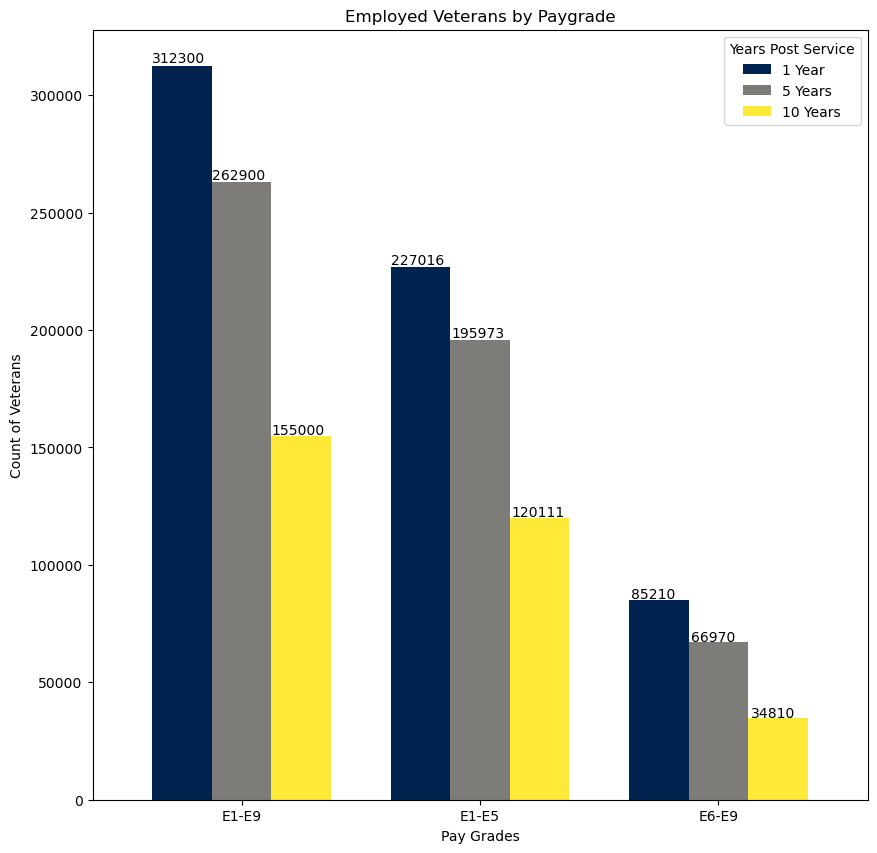

In [170]:

ax = ranks_binned.plot(kind='bar', y=['y1_emp', 'y5_emp','y10_emp'],
                        title="Employed Veterans by Paygrade",
                        width=.75, 
                        figsize=(10,10), 
                        color=cividis_03)
ax.set_xlabel("Pay Grades")
ax.set_ylabel("Count of Veterans")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


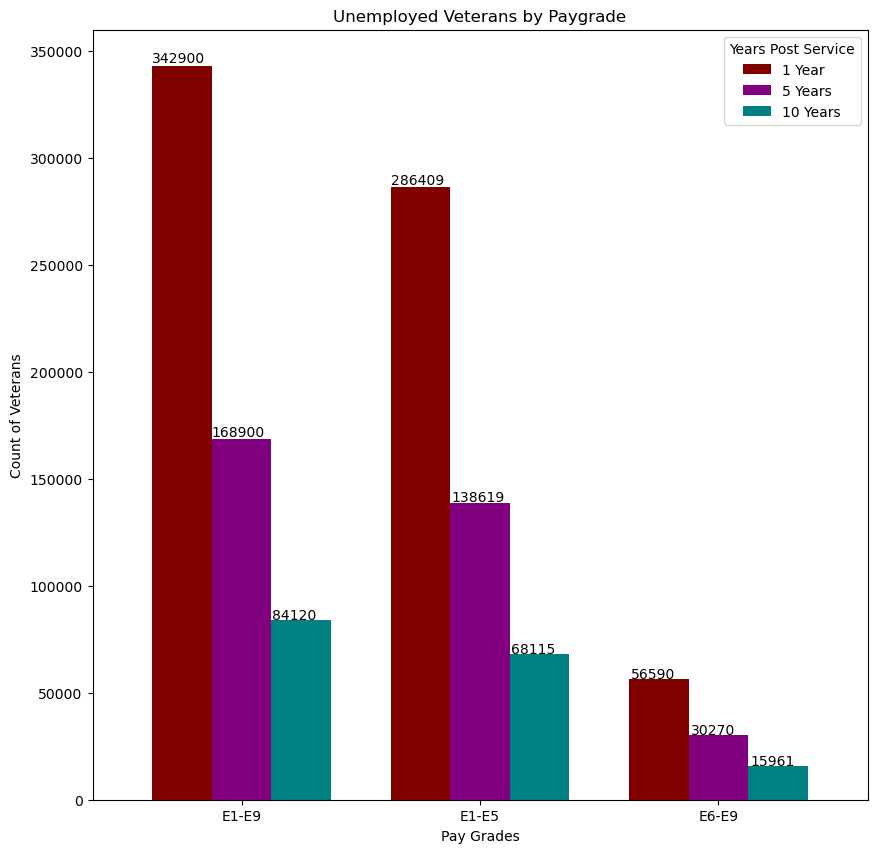

In [169]:
ax = ranks_binned.plot(kind='bar', y=['y1_nonemp', 'y5_nonemp','y10_nonemp'],
                        title="Unemployed Veterans by Paygrade",
                        width=.75, 
                        figsize=(10,10), 
                        color=('Maroon', 'Purple', 'teal'))
ax.set_xlabel("Pay Grades")
ax.set_ylabel("Count of Veterans")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

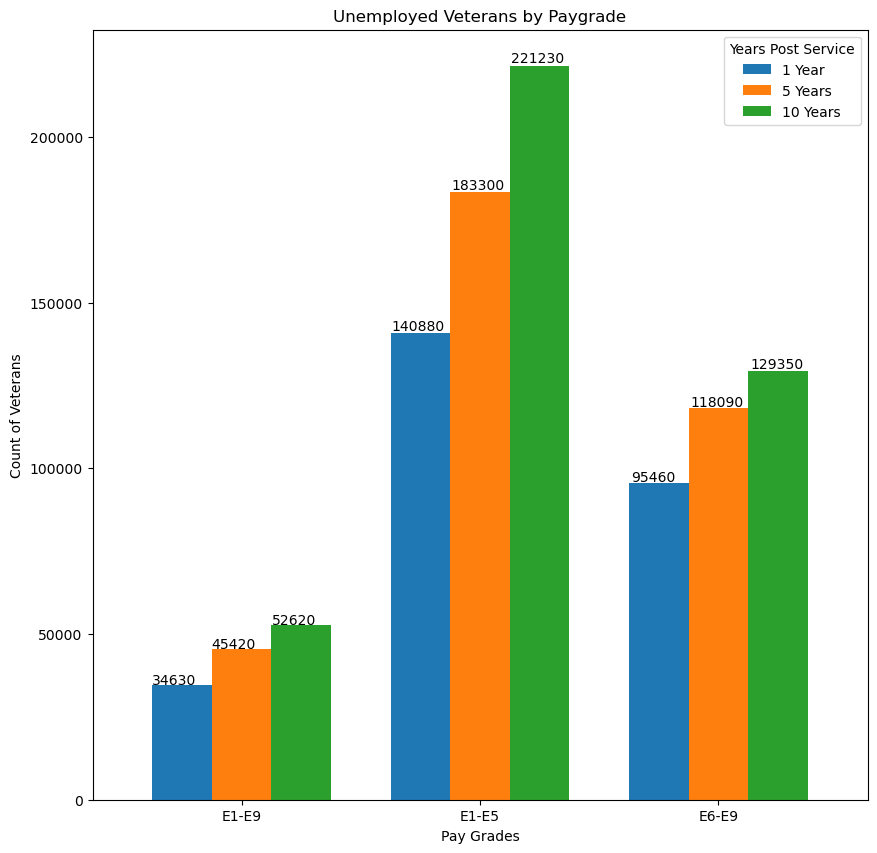

In [171]:
ax = ranks_binned.plot(kind='bar', y=['y1_p50_earnings', 'y5_p50_earnings','y10_p50_earnings'],
                        title="Unemployed Veterans by Paygrade",
                        width=.75, 
                        figsize=(10,10) 
                        )
ax.set_xlabel("Pay Grades")
ax.set_ylabel("Count of Veterans")
ax.tick_params(axis='x', labelrotation=360)
ax.legend(["1 Year", "5 Years", "10 Years"]).set_title("Years Post Service")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))